#Importing some necessary libraries

In [1]:
!pip install setuptools==65.5.0 "wheel<0.40.0"
!pip install d2l==1.0.0b0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.0 MB/s eta 0:00:00
  Attempting uninstall: wheel
    Found existing installation: wheel 0.41.1
    Uninstalling wheel-0.41.1:
      Successfully uninstalled wheel-0.41.1
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
cvxpy 1.3.2 requires setuptools>65.5.1, but you have setuptools 65.5.0 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.6/141.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.1/266.1 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.9 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616796 sha256=4cd3d92aa86b33a79186a792f2ec29d73d4fe4b74a61c3adb1296e8914f74cc3
  Stored in directory: /root/.cache/pip/wheels/81/aa/90/b67df76370d3916a2189b662cf48da38ce41a4e7e58b6abff5
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully u

In [45]:
!pip install torcheval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.4/158.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 7.3 MB/s eta 0:00:00


In [ ]:
#pip install -r requirements.txt

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch
from torch import nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

#Understanding the Data

In [3]:
from google.colab import files
uploaded = files.upload()

Saving AirfoilSelfNoise.csv to AirfoilSelfNoise.csv


In [4]:
def plot_features(trainset, testset=None, spc_feature = None):
  import matplotlib.pyplot as plt
  features = trainset.describe().columns.to_list()
  if testset is None:
    plt.figure (figsize= (35,3))
    j = 1
    while j < len(features):
      for i in features:
        if spc_feature is None:
          ax = plt.subplot(1,len(features),j) #row_num,column_num,possition (0,row_num*column_num)
          plt.hist(trainset[i])
          ax.set_xlabel(i)
          j+=1
        else:
          if i == spc_feature:
            pass
          else:
            ax = plt.subplot(1,len(features)-1,j) #row_num,column_num,possition (0,row_num*column_num)
            ax.scatter(trainset[i], trainset[spc_feature],  color='green')
            ax.set_xlabel(i)
            ax.set_ylabel(spc_feature)
            j+=1
  elif testset is not None:
    plt.figure (figsize= (35,3))
    j = 1
    while j < len(features):
      for i in features:
        if spc_feature == None:
          ax = plt.subplot(1,len(features),j) #row_num,column_num,possition (0,row_num*column_num)
          plt.hist(trainset[i])
          plt.hist(testset[i])
          ax.set_xlabel(i)
          j+=1
        else:
          if i == spc_feature:
            pass
          else:
            ax = plt.subplot(1,len(features)-1,j) #row_num,column_num,possition (0,row_num*column_num)
            ax.scatter(trainset[i], trainset[spc_feature],  color='green')
            ax.scatter(testset[i], testset[spc_feature],  color='red')
            ax.set_xlabel(i)
            ax.set_ylabel(spc_feature)
            j+=1

In [26]:
file_name_dataset = '/content/AirfoilSelfNoise.csv'
df = pd.read_csv(file_name_dataset)
df.head()

,f,alpha,c,U_infinity,delta,SSPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [27]:
df.describe()

,f,alpha,c,U_infinity,delta,SSPL
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [28]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2).highlight_null(color='#f1f1f1')

,f,alpha,c,U_infinity,delta,SSPL
f,1.00,-0.27,-0.00,0.13,-0.23,-0.39
alpha,-0.27,1.00,-0.50,0.06,0.75,-0.16
c,-0.00,-0.50,1.00,0.00,-0.22,-0.24
U_infinity,0.13,0.06,0.00,1.00,-0.00,0.13
delta,-0.23,0.75,-0.22,-0.00,1.00,-0.31
SSPL,-0.39,-0.16,-0.24,0.13,-0.31,1.00


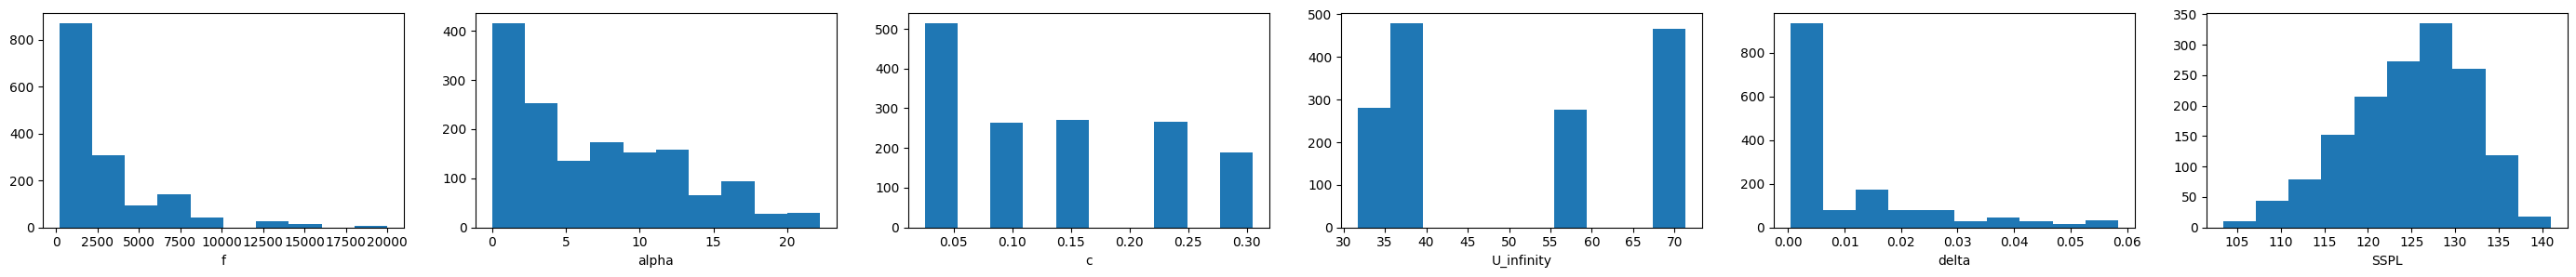

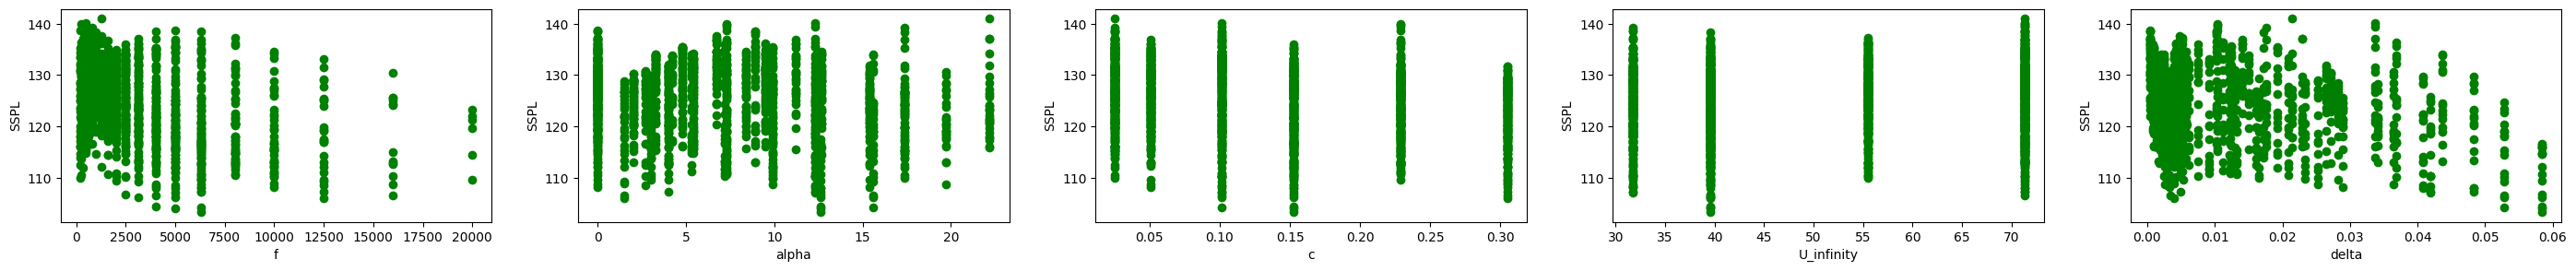

In [29]:
plot_features(df)
plot_features(df, spc_feature = 'SSPL')

In [30]:
#select some features using for regression.
features_list = df.columns.tolist()
data = df[features_list]
data.head()

,f,alpha,c,U_infinity,delta,SSPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


#Creating train and test dataset

In [31]:
#Create 2 sets: train set and test set
#create a mask to select random rows using np.random.rand() function
msk = np.random.rand(len(data)) < 0.8 #select random rows (< 80% of len(df))
print('number of rows in df: ',len(data))
print('number of values in msk: ',len(msk))
print('number of True in msk: ',msk.sum(),'ratio: ',msk.sum()/len(msk))
print('number of False in msk: ',(~msk).sum(),'ratio: ',(~msk).sum()/len(msk))
#np.random.rand(n) => n random values [0,1) => condition: random values > 0.8 => True
train = data[msk] #cdf of True
test = data[~msk] #~msk: True => False and False => True, cdf[~msk]: cdf of False

number of rows in df:  1503
number of values in msk:  1503
number of True in msk:  1227 ratio:  0.8163672654690619
number of False in msk:  276 ratio:  0.18363273453093812


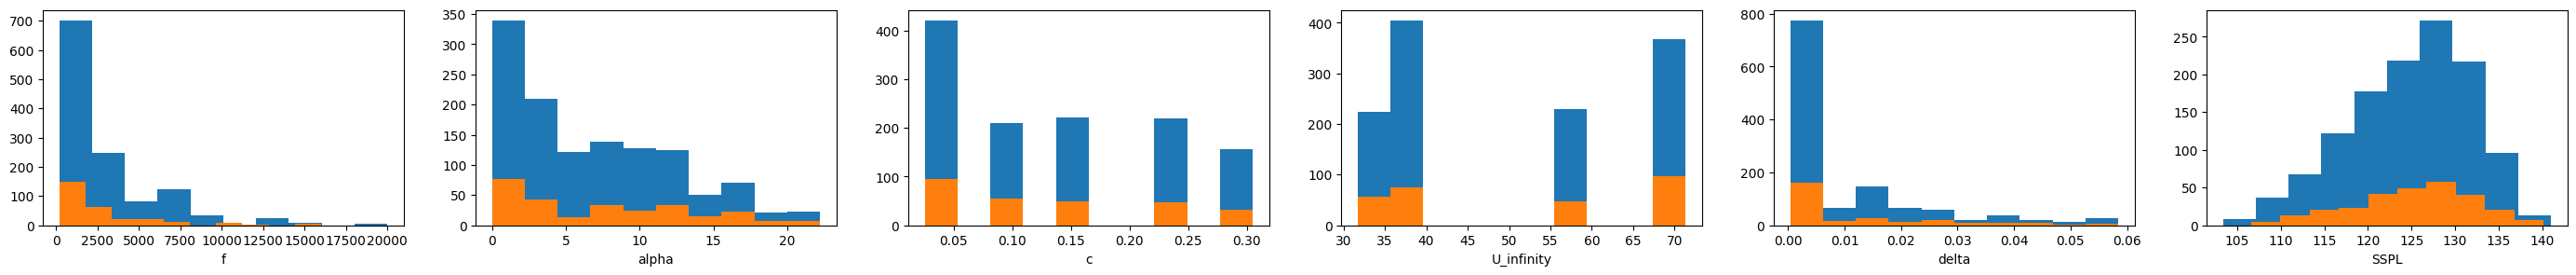

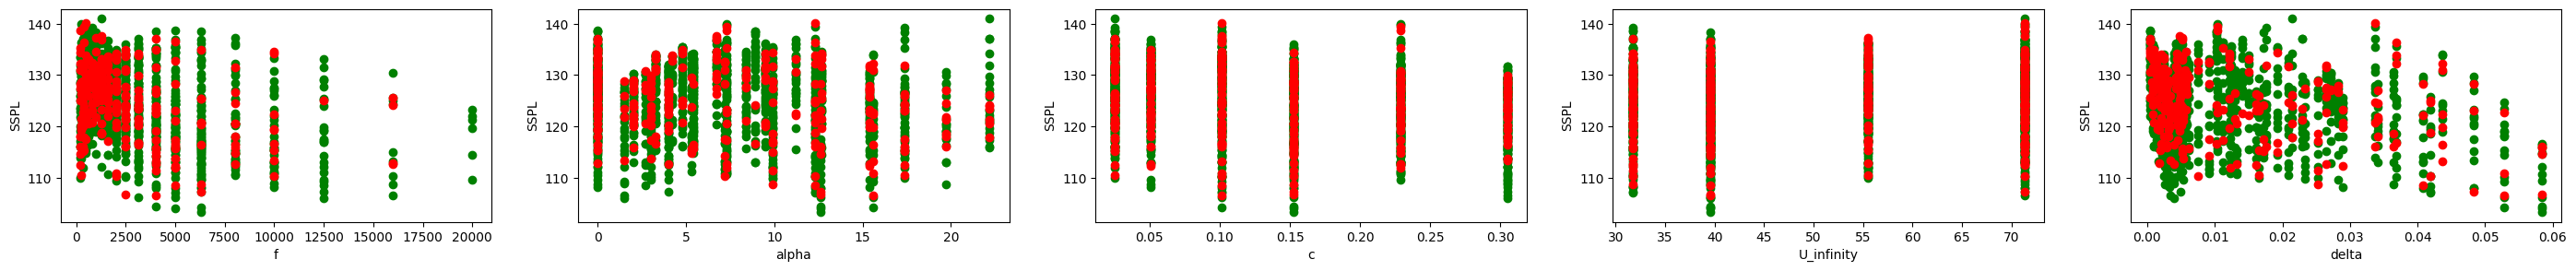

In [32]:
plot_features(train[features_list], test[features_list])
plot_features(train[features_list], test[features_list] ,spc_feature = 'SSPL')

#Data Preparation

In [33]:
def get_data(data):
  data.to_csv("/content/AirfoilSelfNoise.dat", sep = "|")
  data = np.genfromtxt('/content/AirfoilSelfNoise.dat', delimiter='|',  skip_header =1)
  data = (data - data.mean(axis=0)) / data.std(axis=0)
  return torch.Tensor(data[:, :-2]), torch.Tensor(data[:, -1])

X_train,Y_train = get_data(train)
dataset = TensorDataset(X_train,Y_train)

X_train,Y_train = get_data(train)
X_test,Y_test = get_data(test)

#Modeling

In [34]:
# defining the function for forward pass for prediction
def forward(x, w, b):
    return x@w + b

def mini_batch_gradient_descent (X, Y, n_epochs = 10000, batch_size = 32, loss_func = 'MSE', step_size =0.1, delta=5.0):
  w = torch.rand((X.shape[1], 1),requires_grad=True)
  b = torch.rand((1, ),requires_grad=True)
  train_loader = DataLoader(TensorDataset(X,Y), batch_size)
  loss_MBGD = []
  thetas = []

  for i in range(n_epochs):
      Y_hat = forward(X, w, b).reshape(Y.shape)
      if loss_func == 'MSE':
        loss = torch.mean(nn.MSELoss()(Y_hat, Y)).tolist()
      elif loss_func == 'MAE':
        loss = torch.mean(nn.L1Loss()(Y_hat, Y)).tolist()
      elif loss_func == 'Huber':
        loss = torch.mean(nn.HuberLoss(delta=delta)(Y_hat, Y)).tolist()
      loss_MBGD.append(loss)
      thetas.append((w, b))
      print(f'iter {i} : loss = {loss}')

      for x, y in train_loader:
          y_hat = forward(x,w,b).reshape(y.shape)
          if loss_func == 'MSE':
            loss = nn.MSELoss()(y_hat, y)
          elif loss_func == 'MAE':
            loss = nn.L1Loss()(y_hat, y)
          elif loss_func == 'Huber':
            loss = nn.HuberLoss(delta=delta)(y_hat, y)
          loss.backward()
          w.data = w.data - step_size * w.grad.data
          b.data = b.data - step_size * b.grad.data
          w.grad.data.zero_()
          b.grad.data.zero_()
  return loss_MBGD, thetas

##MSE loss

In [35]:
loss_MBGD_MSE, thetas_MSE = mini_batch_gradient_descent (X_train, Y_train , n_epochs = 10000, batch_size = 32, loss_func = 'MSE', step_size =0.001, delta=0.5)

Streaming output truncated to the last 5000 lines.
iter 5000 : loss = 0.5116398930549622
iter 5001 : loss = 0.5116398930549622
iter 5002 : loss = 0.5116398930549622
iter 5003 : loss = 0.5116398930549622
iter 5004 : loss = 0.5116398930549622
iter 5005 : loss = 0.5116398930549622
iter 5006 : loss = 0.5116398930549622
iter 5007 : loss = 0.5116398930549622
iter 5008 : loss = 0.5116398930549622
iter 5009 : loss = 0.5116398930549622
iter 5010 : loss = 0.5116398930549622
iter 5011 : loss = 0.5116398930549622
iter 5012 : loss = 0.5116398930549622
iter 5013 : loss = 0.5116398930549622
iter 5014 : loss = 0.5116398930549622
iter 5015 : loss = 0.5116398930549622
iter 5016 : loss = 0.5116398930549622
iter 5017 : loss = 0.5116398930549622
iter 5018 : loss = 0.5116398930549622
iter 5019 : loss = 0.5116398930549622
iter 5020 : loss = 0.5116398930549622
iter 5021 : loss = 0.5116398930549622
iter 5022 : loss = 0.5116398930549622
iter 5023 : loss = 0.5116398930549622
iter 5024 : loss = 0.5116398930549622

##MAE loss

In [36]:
loss_MBGD_MAE, thetas_MAE = mini_batch_gradient_descent (X_train, Y_train , n_epochs = 10000, batch_size = 32, loss_func = 'MAE', step_size =0.001, delta=0.5)

Streaming output truncated to the last 5000 lines.
iter 5000 : loss = 0.5516838431358337
iter 5001 : loss = 0.5516834259033203
iter 5002 : loss = 0.5516824126243591
iter 5003 : loss = 0.5516823530197144
iter 5004 : loss = 0.5516822338104248
iter 5005 : loss = 0.5516822338104248
iter 5006 : loss = 0.5516831874847412
iter 5007 : loss = 0.5516822338104248
iter 5008 : loss = 0.5516812801361084
iter 5009 : loss = 0.5516839623451233
iter 5010 : loss = 0.5516840219497681
iter 5011 : loss = 0.5516843199729919
iter 5012 : loss = 0.5516811609268188
iter 5013 : loss = 0.5516812205314636
iter 5014 : loss = 0.551681637763977
iter 5015 : loss = 0.5516816973686218
iter 5016 : loss = 0.5516829490661621
iter 5017 : loss = 0.5516843199729919
iter 5018 : loss = 0.551681637763977
iter 5019 : loss = 0.5516829490661621
iter 5020 : loss = 0.5516842603683472
iter 5021 : loss = 0.5516840815544128
iter 5022 : loss = 0.5516837239265442
iter 5023 : loss = 0.5516843199729919
iter 5024 : loss = 0.5516855716705322
i

##Huberloss

In [37]:
loss_MBGD_Huberloss, thetas_Huberloss = mini_batch_gradient_descent (X_train, Y_train , n_epochs = 10000, batch_size = 32, loss_func = 'Huber', step_size =0.001, delta=0.5)

Streaming output truncated to the last 5000 lines.
iter 5000 : loss = 0.17758166790008545
iter 5001 : loss = 0.17758166790008545
iter 5002 : loss = 0.17758166790008545
iter 5003 : loss = 0.17758166790008545
iter 5004 : loss = 0.17758166790008545
iter 5005 : loss = 0.17758166790008545
iter 5006 : loss = 0.17758166790008545
iter 5007 : loss = 0.17758166790008545
iter 5008 : loss = 0.17758166790008545
iter 5009 : loss = 0.17758166790008545
iter 5010 : loss = 0.17758166790008545
iter 5011 : loss = 0.17758166790008545
iter 5012 : loss = 0.17758166790008545
iter 5013 : loss = 0.17758166790008545
iter 5014 : loss = 0.17758166790008545
iter 5015 : loss = 0.17758166790008545
iter 5016 : loss = 0.17758166790008545
iter 5017 : loss = 0.17758166790008545
iter 5018 : loss = 0.17758166790008545
iter 5019 : loss = 0.17758166790008545
iter 5020 : loss = 0.17758166790008545
iter 5021 : loss = 0.17758166790008545
iter 5022 : loss = 0.17758166790008545
iter 5023 : loss = 0.17758166790008545
iter 5024 : l

##Comparing results by loss types

In [38]:
best_thetas_MSE = thetas_MSE[loss_MBGD_MSE.index(min(loss_MBGD_MSE))]
best_thetas_MAE = thetas_MAE[loss_MBGD_MAE.index(min(loss_MBGD_MAE))]
best_thetas_Huberloss = thetas_Huberloss[loss_MBGD_Huberloss.index(min(loss_MBGD_Huberloss))]
print(f'best loss MSE: {min(loss_MBGD_MSE)}, best thetas MSE: {best_thetas_MSE}')
print(f'best loss MAE: {min(loss_MBGD_MAE)},best thetas MAE: {best_thetas_MAE}')
print(f'best loss Huberloss: {min(loss_MBGD_Huberloss)},best thetas Huberloss: {best_thetas_Huberloss}')

best loss MSE: 0.5108343958854675, best thetas MSE: ([[-0.037502385675907135], [-0.5978783369064331], [-0.5890243053436279], [-0.5655588507652283], [0.25430166721343994]], [-0.013998526148498058])
best loss MAE: 0.5511686205863953,best thetas MAE: ([[-0.058686263859272], [-0.6923092603683472], [-0.6300414204597473], [-0.6363458037376404], [0.24816302955150604]], [-0.046770937740802765])
best loss Huberloss: 0.17737235128879547,best thetas Huberloss: ([[-0.05892319977283478], [-0.6673476099967957], [-0.6276147365570068], [-0.625548779964447], [0.24617432057857513]], [-0.013278278522193432])


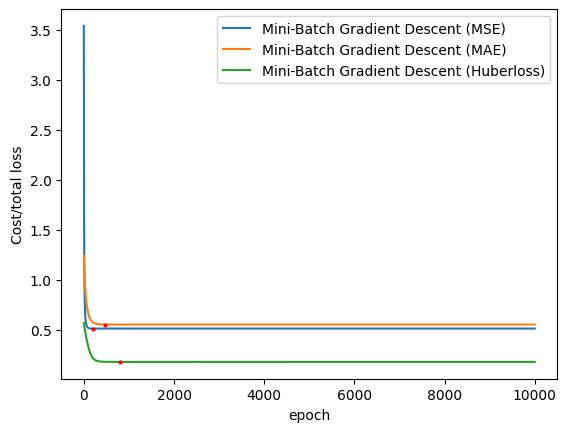

In [39]:
plt.plot(loss_MBGD_MSE,label = "Mini-Batch Gradient Descent (MSE)")
plt.plot(loss_MBGD_MSE.index(min(loss_MBGD_MSE)),min(loss_MBGD_MSE),'ro', markersize=2)
plt.plot(loss_MBGD_MAE,label = "Mini-Batch Gradient Descent (MAE)")
plt.plot(loss_MBGD_MAE.index(min(loss_MBGD_MAE)),min(loss_MBGD_MAE),'ro', markersize=2)
plt.plot(loss_MBGD_Huberloss,label = "Mini-Batch Gradient Descent (Huberloss)")
plt.plot(loss_MBGD_Huberloss.index(min(loss_MBGD_Huberloss)),min(loss_MBGD_Huberloss),'ro', markersize=2)
plt.xlabel('epoch')
plt.ylabel('Cost/total loss')
plt.legend()
plt.show()

#Evaluating

##MSE loss

In [57]:
#Prediction
Y_hat = forward(X_test, best_thetas_MSE[0], best_thetas_MSE[1]).reshape(Y_test.shape)
#Evaluate regression model
from torcheval.metrics.functional import r2_score
print("Residual sum of squares: %.2f"% torch.mean((Y_hat - Y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % (r2_score(Y_hat, Y_test).tolist()))

Residual sum of squares: 0.55
Variance score: 0.45


##MAE loss

In [58]:
#Prediction
Y_hat = forward(X_test, best_thetas_MAE[0], best_thetas_MAE[1]).reshape(Y_test.shape)
#Evaluate regression model
from torcheval.metrics.functional import r2_score
print("Residual sum of squares: %.2f"% torch.mean((Y_hat - Y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % (r2_score(Y_hat, Y_test).tolist()))

Residual sum of squares: 0.57
Variance score: 0.43


#Huberloss

In [59]:
#Prediction
Y_hat = forward(X_test, best_thetas_Huberloss[0], best_thetas_Huberloss[1]).reshape(Y_test.shape)
#Evaluate regression model
from torcheval.metrics.functional import r2_score
print("Residual sum of squares: %.2f"% torch.mean((Y_hat - Y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % (r2_score(Y_hat, Y_test).tolist()))

Residual sum of squares: 0.56
Variance score: 0.44
